In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
from IPython.display import clear_output
from sympy import Polygon, Point
from tqdm import tqdm
import math


In [72]:

#x = np.arange(-4, 94, 1)
#y = np.arange(-73, 15, 1)


# Groupby Data1 and Data2 as count value 
file_path1 = 'C:\ku2022_1\ku2022_16_locopt.csv'
file_path2 = 'C:\ku2022_1\ku2022_16_absproxopt.csv'

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)

df1 = df1.rename(columns = {' location_pos_x' : 'x', ' location_pos_y' : 'y' })
df2 = df2.rename(columns = {' abs_prox_x' : 'x', ' abs_prox_y' : 'y' })
df = pd.concat([df1,df2])





In [73]:
# Create MeshGrid 
max_x = int(df.max()['x']) #print('maximum x :' , int(max_x))
max_y = int(df.max()['y']) #print('maximum y :' ,max_y)
min_x = int(df.min()['x']) #print('minimum x :' ,min_x)
min_y = int(df.min()['y']) #print('minimum y :' ,min_y)

x_range = np.arange(min_x-1, max_x+2, 1)
y_range = np.arange(min_y-1, max_y+2, 1)

ndim = 2
xy = np.array(np.meshgrid(x_range, y_range)).T.reshape(-1, ndim)

print(xy)
#for count, group in df[['x', 'y']].groupby('count'):
#    print(count)
#    print(group)
#    print("\n")



[[ -35 -167]
 [ -35 -166]
 [ -35 -165]
 ...
 [ 128   21]
 [ 128   22]
 [ 128   23]]


In [74]:
grouped = df.groupby(["count"], as_index=False)[['x','y']]   #.apply(list).to_dict() # key 가 count " abs_prox_x", " abs_prox_y"


In [75]:
len(xy)

31324

In [76]:
refvec = [0, 1]
def clockwiseangle_and_distance(point):
    # Vector between point and the origin: v = p - o
    vector = [point[0]-origin[0], point[1]-origin[1]]
    # Length of vector: ||v||
    lenvector = math.hypot(vector[0], vector[1])
    # If length is zero there is no angle
    if lenvector == 0:
        return -math.pi, 0
    # Normalize vector: v/||v||
    normalized = [vector[0]/lenvector, vector[1]/lenvector]
    dotprod  = normalized[0]*refvec[0] + normalized[1]*refvec[1]     # x1*x2 + y1*y2
    diffprod = refvec[1]*normalized[0] - refvec[0]*normalized[1]     # x1*y2 - y1*x2
    angle = math.atan2(diffprod, dotprod)
    # Negative angles represent counter-clockwise angles so we need to subtract them 
    # from 2*pi (360 degrees)
    if angle < 0:
        return 2*math.pi+angle, lenvector
    # I return first the angle because that's the primary sorting criterium
    # but if two vectors have the same angle then the shorter distance should come first.
    return angle, lenvector

In [82]:

trav_point = []
for key, group in tqdm(grouped):
    
    # making grid points and grid arrange 
    data = pd.DataFrame(group)
    max_x = int(data.max()['x']) #print('maximum x :' , int(max_x))
    max_y = int(data.max()['y']) #print('maximum y :' ,max_y)
    min_x = int(data.min()['x']) #print('minimum x :' ,min_x)
    min_y = int(data.min()['y'])
    
   
    x_range = np.arange(min_x-1, max_x+2, 3)
    y_range = np.arange(min_y-1, max_y+2, 3)
    
    xy = np.array(np.meshgrid(x_range, y_range)).T.reshape(-1, ndim)
    
    # sort to clockwise from observer point
    data = pd.DataFrame(group).values.tolist()
    
    origin = data[0]
    if len(data) != 1:
        data = np.array(sorted(data, key=clockwiseangle_and_distance))
        
    poly = Polygon(*data)
    if len(data) != 1 and len(data) != 2:
        for i in range(len(xy)):
            Enclosed = poly.encloses_point(Point(xy[i]))
            if Enclosed == True : 
                trav_point.append(xy[i])
            
trav_point = np.array(trav_point)

print(trav_point)  
        
            
            
        
    



    

#for i in range(len(grouped)):
#    data1 = grouped.get_group(i)
#    print(data1) 

100%|██████████| 1343/1343 [15:46<00:00,  1.42it/s]

[[ 2 -1]
 [ 2  2]
 [ 2  5]
 ...
 [ 8 -4]
 [ 8 -1]
 [ 8  2]]


In [37]:
#test
"""file_path = 'C:/GNG2/travepoint/ku2022_13_travpoint/trav_point_grid3.csv'

nise = pd.read_csv(file_path1)
dataset5 = nise.iloc[:,[2,3]].to_numpy()

print(len(dataset5))
new_dataset5 = np.unique(dataset5, axis=0)
print(len(new_dataset5))"""

568
556


In [83]:
# erase duplicated array
new_data = np.unique(trav_point, axis=0)
print(new_data)
print(len(new_data))

[[ -32 -155]
 [ -31 -150]
 [ -30 -149]
 ...
 [ 125 -145]
 [ 125 -144]
 [ 126 -147]]
3012


8562


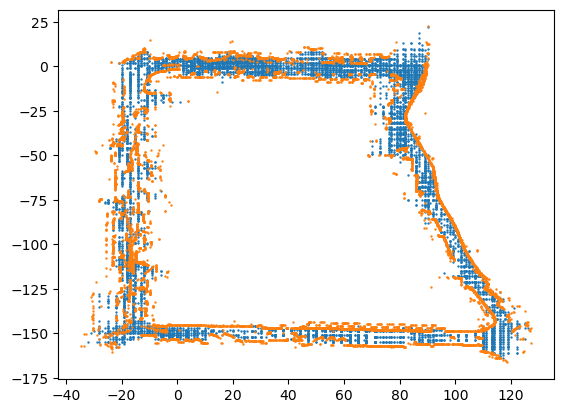

In [84]:
dataset1 = df1.iloc[:,[2,3]].to_numpy()
dataset2 =  df2.iloc[:,[2,3]].to_numpy()
print(len(trav_point))
plt.scatter(*trav_point.T,s=0.5)
plt.scatter(*dataset2.T,s=0.5)

3012


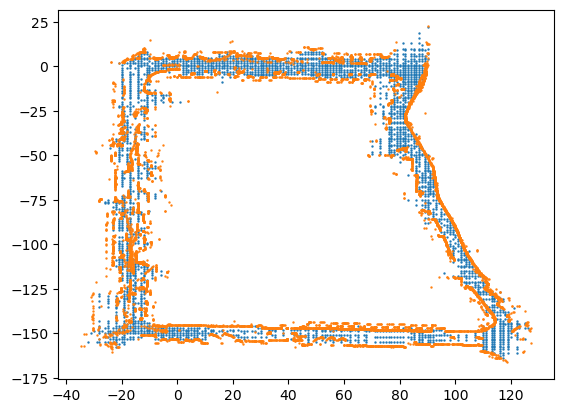

In [85]:
dataset1 = df1.iloc[:,[2,3]].to_numpy()
dataset2 =  df2.iloc[:,[2,3]].to_numpy()
print(len(new_data))
plt.scatter(*new_data.T,s=0.5)
plt.scatter(*dataset2.T,s=0.5)

In [86]:
df = pd.DataFrame(new_data, columns = ['x', 'y'])
print(df)
df.to_csv('C:/GNG2/travepoint/ku2022_16_trav_point_grid3.csv')

        x    y
0     -32 -155
1     -31 -150
2     -30 -149
3     -29 -155
4     -28 -155
...   ...  ...
3007  125 -153
3008  125 -147
3009  125 -145
3010  125 -144
3011  126 -147

[3012 rows x 2 columns]
